#Ejercicio 8
#Comparación de muestreo sub-Nyquist y sobre-Nyquist

##Objetivo
-Generar una señal compuesta por varias frecuencias.
-Muestrearla a distintas frecuencias de muestreo: una inferior, una igual y una superior a 2·f_max.
-Observar el efecto del aliasing y compararlo visualmente.

##Pasos
-Crear una señal compuesta de 3 senoidales con frecuencias bien separadas (por ejemplo, 300 Hz, 800 Hz, 1.5 kHz) y duración de 1 segundo a una frecuencia de muestreo alta (44.1 kHz).
-Remuestrear la señal con scipy.signal.resample a tres valores de fs: - fs_bajo < 2·f_max - fs_limite ≈ 2·f_max - fs_alto > 2·f_max
-Graficar para cada caso: - Señal en el tiempo (zoom a 20 ms). - FFT hasta 2 kHz.
-Discutir en qué casos se observa aliasing y cómo se “mezclan” las frecuencias.

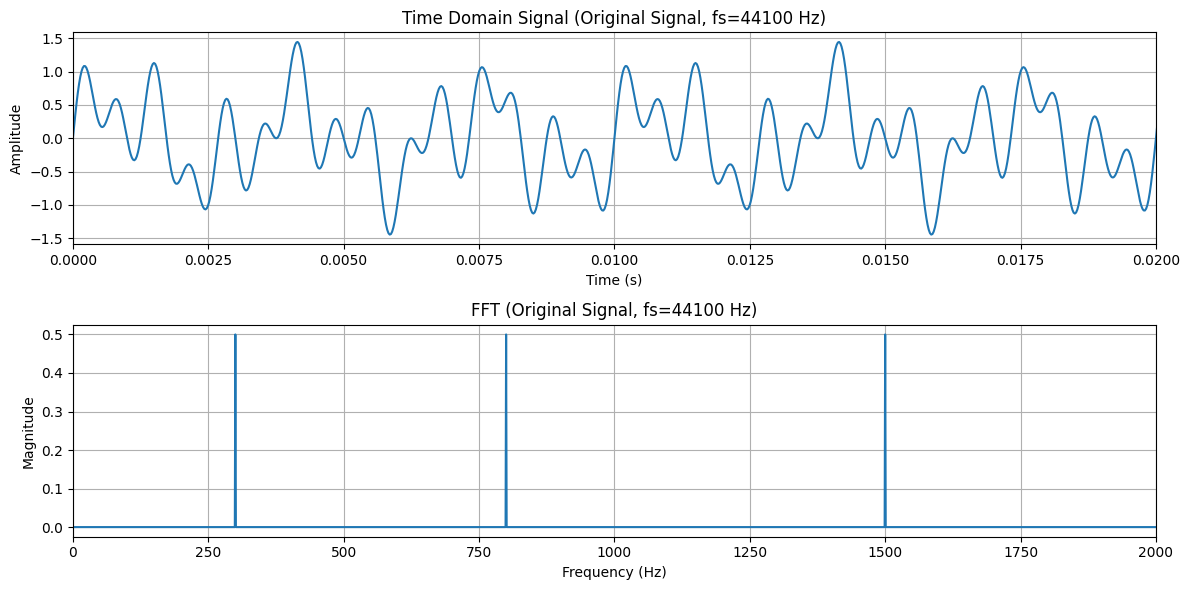

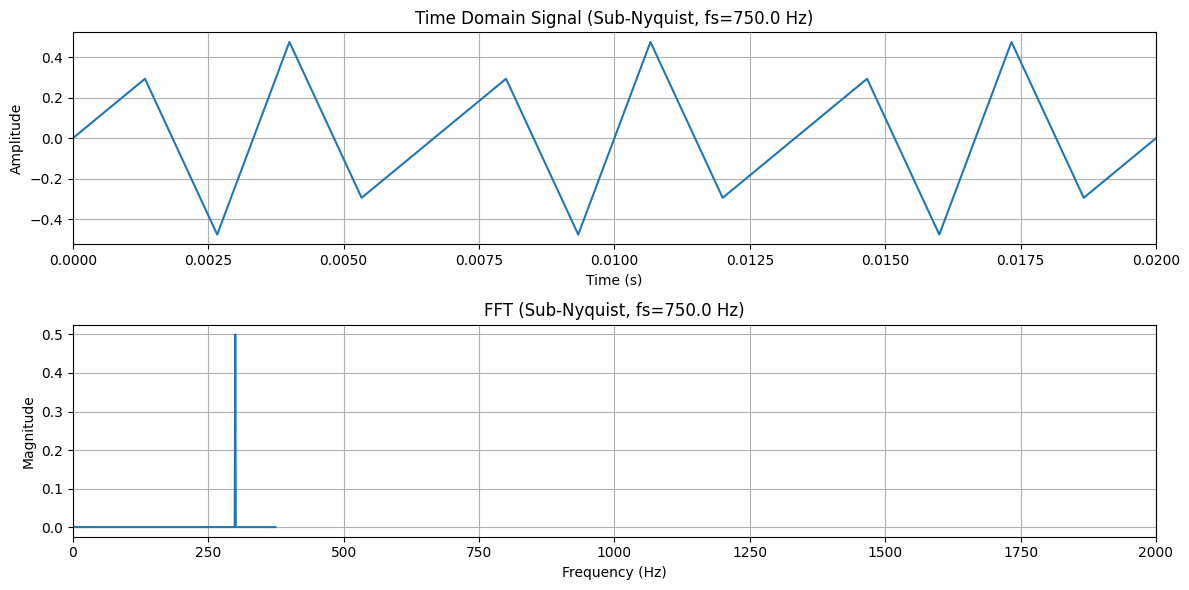

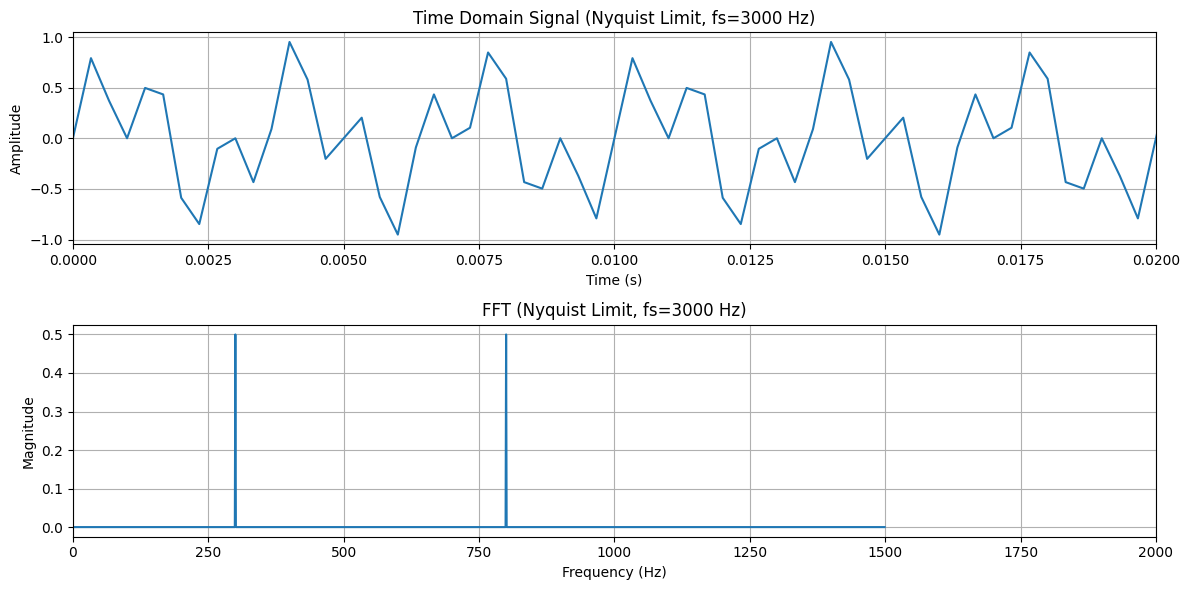

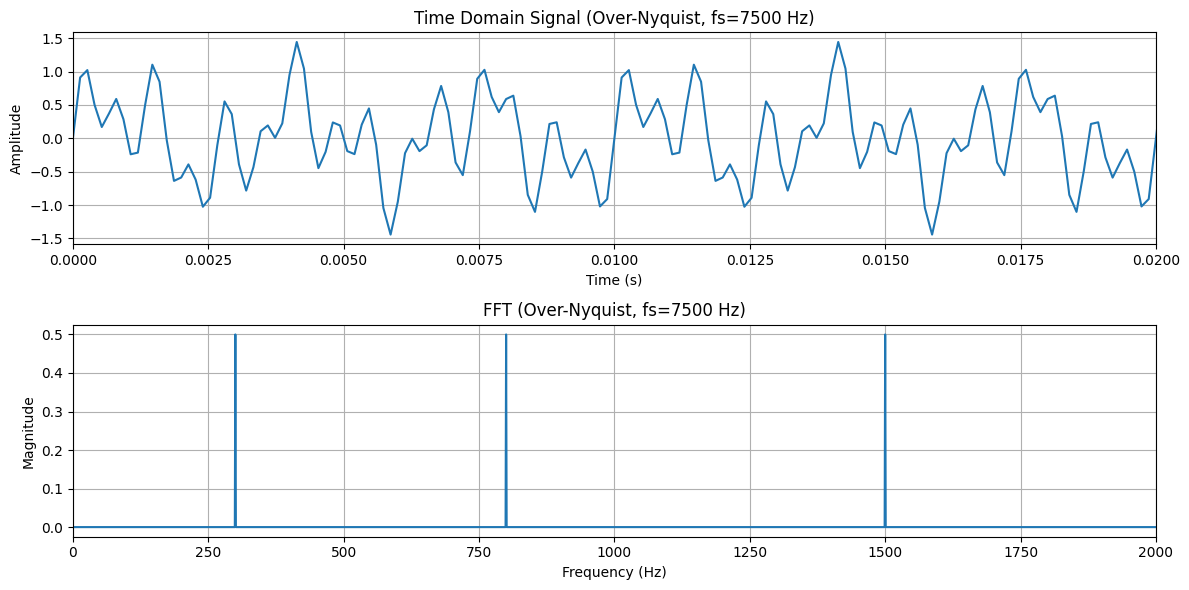

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample, fftconvolve
from scipy.fft import fft, fftfreq

# Parameters
fs_high = 44100  # High sampling frequency
duration = 1  # seconds
t = np.linspace(0, duration, int(fs_high * duration), endpoint=False)

# Create composite signal
f1, f2, f3 = 300, 800, 1500  # Frequencies of sinusoids
signal = 0.5 * np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.5 * np.sin(2 * np.pi * f3 * t)

# Resampling frequencies
f_max = max(f1, f2, f3)
fs_low = 0.5 * f_max  # Sub-Nyquist (e.g., 1.5 * 1500 = 2250 Hz)
fs_limit = 2 * f_max  # Nyquist limit (e.g., 2 * 1500 = 3000 Hz)
fs_high_resample = 5 * f_max  # Over-Nyquist (e.g., 3 * 1500 = 4500 Hz)

resample_frequencies = [fs_high, fs_low, fs_limit, fs_high_resample] # Added fs_high
labels = ['Original Signal', 'Sub-Nyquist', 'Nyquist Limit', 'Over-Nyquist'] # Added label for Original Signal

for fs, label in zip(resample_frequencies, labels):
    if label == 'Original Signal':
        resampled_signal = signal
        t_resampled = t
        num_samples = len(signal)
    else:
        num_samples = int(duration * fs)
        resampled_signal = resample(signal, num_samples)
        t_resampled = np.linspace(0, duration, num_samples, endpoint=False)

    # Plot time domain signal (zoom to 20 ms)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t_resampled, resampled_signal)
    plt.title(f'Time Domain Signal ({label}, fs={fs} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 0.02)  # Zoom to 20 ms
    plt.grid(True)

    # Plot FFT
    plt.subplot(2, 1, 2)
    yf = fft(resampled_signal)
    xf = fftfreq(num_samples, 1/fs)
    plt.plot(xf[:num_samples//2], 2.0/num_samples * np.abs(yf[0:num_samples//2]))
    plt.title(f'FFT ({label}, fs={fs} Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, 2000)  # Limit FFT plot to 2 kHz
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Estos gráficos muestran una señal compuesta por tres ondas sinusoidales con  recuencias de 300 Hz, 800 Hz y 1500 Hz, muestreada a diferentes frecuencias. Cada par de gráficos (dominio del tiempo y FFT) corresponde a una frecuencia de muestreo diferente.

Original Signal (fs=44100 Hz): Este es el gráfico de la señal original muestreada a una alta frecuencia (44100 Hz), muy por encima de la frecuencia de Nyquist para esta señal compuesta. En el dominio del tiempo, se puede observar claramente la forma de onda compleja resultante de la suma de las tres sinusoides. En la FFT, se ven picos nítidos y distintos en las frecuencias de 300 Hz, 800 Hz y 1500 Hz, lo que indica que la señal original está bien representada y no hay pérdida de información de frecuencia.

Sub-Nyquist (fs=750.0 Hz): Aquí, la señal se muestrea a 2250 Hz, que está por debajo de la frecuencia de Nyquist (3000 Hz) para el componente de frecuencia más alta (1500 Hz). En el dominio del tiempo, la forma de onda se ve distorsionada y no representa fielmente la señal original. En la FFT, además de los picos en las frecuencias originales (aunque posiblemente con amplitudes alteradas), pueden aparecer picos adicionales a frecuencias que no estaban en la señal original. Este fenómeno se conoce como aliasing y ocurre cuando la frecuencia de muestreo es demasiado baja para capturar correctamente los componentes de alta frecuencia de la señal, haciendo que parezcan frecuencias más bajas.

Nyquist Limit (fs=3000 Hz): La señal se muestrea a 3000 Hz, que es exactamente el doble de la frecuencia más alta en la señal original (1500 Hz), es decir, la frecuencia de Nyquist. En teoría, muestrear a la frecuencia de Nyquist es suficiente para reconstruir una señal, siempre y cuando la señal no tenga componentes de frecuencia exactamente en la mitad de la frecuencia de muestreo. En el dominio del tiempo, la forma de onda comienza a parecerse más a la original que en el caso sub-Nyquist, aunque aún puede haber algunas distorsiones. En la FFT, deberías ver los picos en las frecuencias originales, con un aliasing mínimo o nulo para los componentes dentro de este límite.

Over-Nyquist (fs=7500 Hz): La señal se muestrea a 7500 Hz, que está por encima de la frecuencia de Nyquist. Similar al caso de 44100 Hz, en el dominio del tiempo, la forma de onda se acerca más a la señal original. En la FFT, los picos en las frecuencias originales son claros y no debería haber aliasing significativo. Muestrear por encima de la frecuencia de Nyquist evita el aliasing y permite una representación precisa de la señal.

f_max (fs=1500 Hz): Este gráfico muestra la señal muestreada a 1500 Hz, que es igual a la frecuencia más alta presente en la señal original. En el dominio del tiempo, la forma de onda está significativamente distorsionada debido a que la frecuencia de muestreo es igual a uno de los componentes de la señal. En la FFT, es probable que solo veas el pico en 300 Hz y 800 Hz, y el pico de 1500 Hz podría ser muy bajo o ausente, o incluso aparecer como aliasing en otra frecuencia, ya que la frecuencia de muestreo no es suficiente para representar correctamente la componente de 1500 Hz.

En resumen, estos gráficos ilustran el Teorema de Muestreo de Nyquist-Shannon, que establece que para reconstruir perfectamente una señal analógica a partir de sus muestras digitales, la frecuencia de muestreo debe ser al menos el doble de la frecuencia más alta presente en la señal (la frecuencia de Nyquist). Cuando la frecuencia de muestreo es menor que la frecuencia de Nyquist, se produce el aliasing, que distorsiona el espectro de frecuencia y la forma de onda de la señal muestreada. Muestrear por encima de la frecuencia de Nyquist evita el aliasing y permite una representación precisa de la señal.